Access the files, visualise in one plot

In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define directories
input_parent_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output"
output_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Analysis"
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Define mappings
output_definitions = {
    "675b1c0d8313f": "full length vs ENOA",
    "675b1debb2b1f": "full length vs LBR Alpha",
    "675b1eec7d0d4": "full length vs ACTB em",
    "675b20d5e52e8": "splice alpha vs ENOA",
    "675b2115b4408": "splice alpha vs LBR Alpha",
    "675b216502423": "splice alpha vs ACTB em",
    "675b241068bc0": "soluble form AA Seq vs ENOA",
    "675b2439eea0f": "soluble form AA Seq vs LBR Alpha",
    "675b24721c8b9": "soluble form AA Seq vs ACTB em",
    "6790163b87783": "full length vs CSTA NMR",
    "679015039c166": "full length vs CSTA alphafold",
    "679015c2d93a8": "full length vs HSP90AA1 Alpha fold",
    "6790143608535": "full length vs HSP90AA1 xray",
    "679013da1155f": "full length vs HSPA5 alphafold",
    "6790131659c8a": "full length vs HSPA5 xray",
    "6790137bd3847": "full length vs PRDX1 xray",
    "679010fdc2bf2": "full length vs alphafold PRDX1",
    "67990992803ee": "full length vs NRF2 (+)",
    "67990a5624a45": "full length vs 14-3-3 Zeta/D (+)",
    "67990b00aeb7d": "full length vs RNF139 TRC8 (+)",
    "679b7e826ca75": "full length vs FOLR1 Alphafold (-)",
    "679b7f2edd0ee": "full length vs IGFBP1 Alphafold (-)",
    "679b7f6dc8b77": "full length vs IL10 Alphafold (-)"
}

# Function to parse HDOCK .out files (only first 100 rows)
def parse_hdock_output(file_path):
    results = []
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()[5:105]  # Skip metadata, take only first 100 rows
            for line in lines:
                data = line.strip().split()
                if len(data) == 9:
                    try:
                        results.append({
                            "Translation_X": float(data[0]),
                            "Translation_Y": float(data[1]),
                            "Translation_Z": float(data[2]),
                            "Rotation_X": float(data[3]),
                            "Rotation_Y": float(data[4]),
                            "Rotation_Z": float(data[5]),
                            "Binding_Score": float(data[6]),
                            "RMSD": float(data[7]),
                            "Translational_ID": int(float(data[8]))
                        })
                    except ValueError:
                        continue
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
    return results

all_out_files = sorted(glob.glob(os.path.join(input_parent_dir, "**/*.out"), recursive=True))

# Create a combined DataFrame
df_all = pd.DataFrame()

for out_file in all_out_files:
    raw_id = os.path.basename(out_file).split('.')[0]   # e.g., "hdock_675b1c0d8313f"
    file_id = raw_id.split('_')[-1]                      # get "675b1c0d8313f"
    file_label = output_definitions.get(file_id, file_id)  # Use mapping if available, else raw ID
    docking_results = parse_hdock_output(out_file)
    if docking_results:
        df = pd.DataFrame(docking_results)
        df["File"] = file_label
        df_all = pd.concat([df_all, df], ignore_index=True)

# Check if DataFrame has data
if df_all.empty:
    print("No docking results to process.")
else:
    print("Combined DataFrame preview:")
    print(df_all.head())

    # Generate comparison plots
    for column in ["Binding_Score", "RMSD", "Translation_X", "Translation_Y", "Translation_Z"]:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x="File", y=column, data=df_all, palette="Set3")
        plt.xticks(rotation=90, ha='right')
        plt.title(f"{column} Comparison Across Files")
        plt.xlabel("File")
        plt.ylabel(column)
        plt.tight_layout()
        
        # Save plot
        plot_path = os.path.join(output_dir, f"{column}_comparison.png")
        plt.savefig(plot_path, dpi=300)
        plt.close()

    print(f"All box plots saved in {output_dir}")


Combined DataFrame preview:
   Translation_X  Translation_Y  Translation_Z  Rotation_X  Rotation_Y  \
0        2.22921        1.59701        5.29045       4.167     101.268   
1        1.99089        1.85883        1.59919     -18.587       9.496   
2        5.46504        1.50058        3.21781       5.774     105.689   
3        1.83699        1.53735        5.39767       7.458     110.312   
4        5.46021        1.42334        3.25015       6.930     108.429   

   Rotation_Z  Binding_Score    RMSD  Translational_ID                 File  
0     102.027        -247.49  156.03                 1  full length vs ENOA  
1     132.096        -240.55  149.92                 1  full length vs ENOA  
2     167.045        -235.18  204.17                 1  full length vs ENOA  
3     158.594        -225.88  201.10                 1  full length vs ENOA  
4     164.650        -225.60  203.65                 1  full length vs ENOA  


/var/folders/x9/158tq1912x740t0hq5d07lx80000gn/T/ipykernel_13838/3524112624.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="File", y=column, data=df_all, palette="Set3")
/var/folders/x9/158tq1912x740t0hq5d07lx80000gn/T/ipykernel_13838/3524112624.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="File", y=column, data=df_all, palette="Set3")
/var/folders/x9/158tq1912x740t0hq5d07lx80000gn/T/ipykernel_13838/3524112624.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="File", y=column, data=df_all, palette="Set3")
/var/folders/

All box plots saved in /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Analysis


In [4]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define directories
input_parent_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output"
output_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Analysis"
os.makedirs(output_dir, exist_ok=True)  # Ensure output directory exists

# Define mappings
output_definitions = {
    "675b1c0d8313f": "full length vs ENOA",
    "675b1debb2b1f": "full length vs LBR Alpha",
    "675b1eec7d0d4": "full length vs ACTB em",
    "675b20d5e52e8": "splice alpha vs ENOA",
    "675b2115b4408": "splice alpha vs LBR Alpha",
    "675b216502423": "splice alpha vs ACTB em",
    "675b241068bc0": "soluble form AA Seq vs ENOA",
    "675b2439eea0f": "soluble form AA Seq vs LBR Alpha",
    "675b24721c8b9": "soluble form AA Seq vs ACTB em"
}

# Function to parse HDOCK .out files (only first 100 rows)
def parse_hdock_output(file_path):
    results = []
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()[5:105]  # Skip metadata, take only first 100 rows
            for line in lines:
                data = line.strip().split()
                if len(data) == 9:
                    try:
                        results.append({
                            "Translation_X": float(data[0]),
                            "Translation_Y": float(data[1]),
                            "Translation_Z": float(data[2]),
                            "Rotation_X": float(data[3]),
                            "Rotation_Y": float(data[4]),
                            "Rotation_Z": float(data[5]),
                            "Binding_Score": float(data[6]),
                            "RMSD": float(data[7]),
                            "Translational_ID": int(float(data[8]))
                        })
                    except ValueError:
                        continue
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
    return results

all_out_files = sorted(glob.glob(os.path.join(input_parent_dir, "**/*.out"), recursive=True))

# Create a combined DataFrame
df_all = pd.DataFrame()

for out_file in all_out_files:
    raw_id = os.path.basename(out_file).split('.')[0]   # e.g., "hdock_675b1c0d8313f"
    file_id = raw_id.split('_')[-1]                      # get "675b1c0d8313f"
    file_label = output_definitions.get(file_id, file_id)  # Use mapping if available, else raw ID
    docking_results = parse_hdock_output(out_file)
    if docking_results:
        df = pd.DataFrame(docking_results)
        df["File"] = file_label
        df_all = pd.concat([df_all, df], ignore_index=True)

# Check if DataFrame has data
if df_all.empty:
    print("No docking results to process.")
else:
    print("Combined DataFrame preview:")
    print(df_all.head())

    # Filter data for each specific group of files

    # 1. "full length vs ENOA", "splice alpha vs ENOA", "soluble form AA Seq vs ENOA"
    df_enoa = df_all[df_all["File"].isin([
        "full length vs ENOA", 
        "splice alpha vs ENOA", 
        "soluble form AA Seq vs ENOA"
    ])]

    # 2. "full length vs LBR Alpha", "splice alpha vs LBR Alpha", "soluble form AA Seq vs LBR Alpha"
    df_lbr_alpha = df_all[df_all["File"].isin([
        "full length vs LBR Alpha", 
        "splice alpha vs LBR Alpha", 
        "soluble form AA Seq vs LBR Alpha"
    ])]

    # 3. "full length vs ACTB em", "splice alpha vs ACTB em", "soluble form AA Seq vs ACTB em"
    df_actb_em = df_all[df_all["File"].isin([
        "full length vs ACTB em", 
        "splice alpha vs ACTB em", 
        "soluble form AA Seq vs ACTB em"
    ])]

    # Generate comparison plots for each group

    # Plot for "full length vs ENOA", "splice alpha vs ENOA", "soluble form AA Seq vs ENOA"
    for column in ["Binding_Score", "RMSD", "Translation_X", "Translation_Y", "Translation_Z"]:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x="File", y=column, data=df_enoa, palette="Set3")
        plt.xticks(rotation=90, ha='right')
        plt.title(f"{column} Comparison (ENOA)")
        plt.xlabel("File")
        plt.ylabel(column)
        plt.tight_layout()
        
        # Save plot
        plot_path = os.path.join(output_dir, f"{column}_enoa_comparison.png")
        plt.savefig(plot_path, dpi=300)
        plt.close()

    # Plot for "full length vs LBR Alpha", "splice alpha vs LBR Alpha", "soluble form AA Seq vs LBR Alpha"
    for column in ["Binding_Score", "RMSD", "Translation_X", "Translation_Y", "Translation_Z"]:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x="File", y=column, data=df_lbr_alpha, palette="Set2")
        plt.xticks(rotation=90, ha='right')
        plt.title(f"{column} Comparison (LBR Alpha)")
        plt.xlabel("File")
        plt.ylabel(column)
        plt.tight_layout()
        
        # Save plot
        plot_path = os.path.join(output_dir, f"{column}_lbr_alpha_comparison.png")
        plt.savefig(plot_path, dpi=300)
        plt.close()

    # Plot for "full length vs ACTB em", "splice alpha vs ACTB em", "soluble form AA Seq vs ACTB em"
    for column in ["Binding_Score", "RMSD", "Translation_X", "Translation_Y", "Translation_Z"]:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x="File", y=column, data=df_actb_em, palette="Set1")
        plt.xticks(rotation=90, ha='right')
        plt.title(f"{column} Comparison (ACTB em)")
        plt.xlabel("File")
        plt.ylabel(column)
        plt.tight_layout()
        
        # Save plot
        plot_path = os.path.join(output_dir, f"{column}_actb_em_comparison.png")
        plt.savefig(plot_path, dpi=300)
        plt.close()

    print(f"All box plots saved in {output_dir}")


Combined DataFrame preview:
   Translation_X  Translation_Y  Translation_Z  Rotation_X  Rotation_Y  \
0        2.22921        1.59701        5.29045       4.167     101.268   
1        1.99089        1.85883        1.59919     -18.587       9.496   
2        5.46504        1.50058        3.21781       5.774     105.689   
3        1.83699        1.53735        5.39767       7.458     110.312   
4        5.46021        1.42334        3.25015       6.930     108.429   

   Rotation_Z  Binding_Score    RMSD  Translational_ID                 File  
0     102.027        -247.49  156.03                 1  full length vs ENOA  
1     132.096        -240.55  149.92                 1  full length vs ENOA  
2     167.045        -235.18  204.17                 1  full length vs ENOA  
3     158.594        -225.88  201.10                 1  full length vs ENOA  
4     164.650        -225.60  203.65                 1  full length vs ENOA  


/var/folders/x9/158tq1912x740t0hq5d07lx80000gn/T/ipykernel_13838/2974280655.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="File", y=column, data=df_enoa, palette="Set3")
/var/folders/x9/158tq1912x740t0hq5d07lx80000gn/T/ipykernel_13838/2974280655.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="File", y=column, data=df_enoa, palette="Set3")
/var/folders/x9/158tq1912x740t0hq5d07lx80000gn/T/ipykernel_13838/2974280655.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="File", y=column, data=df_enoa, palette="Set3")
/var/fo

All box plots saved in /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Analysis


In [2]:
# Create a combined DataFrame with data from all three groups
df_combined = pd.concat([df_group_1, df_group_2, df_group_3], ignore_index=True)

# Add a new column 'Group' to indicate which group each row belongs to
df_combined['Group'] = ['ENOA'] * len(df_group_1) + ['LBR Alpha'] * len(df_group_2) + ['ACTB em'] * len(df_group_3)

# Perform ANOVA for Binding Score across all groups
model = ols("Binding_Score ~ C(Group)", data=df_combined).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA results for Binding Score comparison across all groups:")
print(anova_table)

# Perform Tukey HSD test for multiple comparisons between groups
tukey = pairwise_tukeyhsd(df_combined["Binding_Score"], df_combined["Group"], alpha=0.05)
print("\nTukey HSD Test Results for Binding Score comparison across all groups:")
print(tukey)

# Create the box plot comparing Binding Scores across all groups
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x="Group", y="Binding_Score", data=df_combined, palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title("Binding Score Comparison Across ENOA, LBR Alpha, and ACTB em")
plt.xlabel("Group")
plt.ylabel("Binding Score")
plt.tight_layout()

# Add statistical significance annotations from Tukey HSD results
sig_pairs = [(pair[0], pair[1]) for pair, p_val in zip(tukey._multicomp.pairindices, tukey.pvalues) if p_val < 0.05]
for (i, j) in sig_pairs:
    x1, x2 = i, j
    y = df_combined["Binding_Score"].max() + 2  # Position above max value
    plt.plot([x1, x1, x2, x2], [y, y + 1, y + 1, y], lw=1.5, c="black")
    plt.text((x1 + x2) / 2, y + 1.5, "*", ha='center', va='bottom', color="red")

# Save the plot
plot_path = os.path.join(output_dir, "Binding_Score_Comparison_All_Groups.png")
plt.savefig(plot_path, dpi=300)
plt.close()

# Save Tukey HSD results to a text file
tukey_results_path = os.path.join(output_dir, "Tukey_HSD_Binding_Score_Comparison_All_Groups.txt")
with open(tukey_results_path, "w") as f:
    f.write(str(tukey))

print(f"Tukey HSD results saved in {tukey_results_path}")
print(f"Box plot saved at {plot_path}")


NameError: name 'df_group_1' is not defined

In [22]:
import os
import glob

# Define the correct parent directory
parent_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output"

# Check if the directory exists
if not os.path.exists(parent_dir):
    print(f"Error: Directory '{parent_dir}' does not exist.")
else:
    # Iterate through each folder inside the parent directory
    for folder in os.listdir(parent_dir):
        folder_path = os.path.join(parent_dir, folder)

        # Check if it's a directory
        if os.path.isdir(folder_path):
            # Find the .out file inside the folder
            out_files = glob.glob(os.path.join(folder_path, "*.out"))

            if out_files:
                out_file = out_files[0]  # Assuming there's only one .out file per folder
                print(f"Processing: {out_file}")

Processing: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/67990b00aeb7d/hdock_67990b00aeb7d.out
Processing: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/679b7e826ca75/hdock_679b7e826ca75.out
Processing: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/675b2115b4408/hdock_675b2115b4408 2.out
Processing: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/679015c2d93a8/hdock_679015c2d93a8.out
Processing: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/67990a5624a45/hdock_67990a5624a45.out
Processing: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/679b7f6dc8b77/hdock_679b7f6dc8b77.out
Processing: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2

In [24]:
import os
import glob
import pandas as pd

# Define the parent directory containing subfolders with .out files
parent_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output"

# Function to parse a single .out file
def parse_hdock_output(file_path):
    results = []
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            
            # Ensure there are enough lines (assuming the first 5 are metadata)
            if len(lines) < 6:
                print(f"Warning: {file_path} has insufficient data.")
                return results  

            # Process lines after the header
            for line in lines[5:]:
                data = line.strip().split()
                if len(data) >= 9:  # Ensure we have enough columns
                    try:
                        results.append({
                            "Translation_X": float(data[0]),
                            "Translation_Y": float(data[1]),
                            "Translation_Z": float(data[2]),
                            "Rotation_X": float(data[3]),
                            "Rotation_Y": float(data[4]),
                            "Rotation_Z": float(data[5]),
                            "Binding_Score": float(data[6]),
                            "RMSD": float(data[7]),
                            "Translational_ID": int(float(data[8]))
                        })
                    except ValueError:
                        print(f"Skipping malformed line in {file_path}: {line.strip()}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

    return results

# Dictionary to store DataFrames for each processed .out file
all_results = {}

# Loop through each subfolder in the parent directory
for folder in os.listdir(parent_dir):
    subfolder_path = os.path.join(parent_dir, folder)
    if os.path.isdir(subfolder_path):
        # Find .out files in the subfolder
        out_files = glob.glob(os.path.join(subfolder_path, "*.out"))
        for out_file in out_files:
            print(f"\nAnalyzing file: {out_file}")
            docking_results = parse_hdock_output(out_file)
            
            if docking_results:  # If valid results were parsed
                df = pd.DataFrame(docking_results)
                all_results[out_file] = df  # Store the DataFrame for further analysis if needed



Analyzing file: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/67990b00aeb7d/hdock_67990b00aeb7d.out

Analyzing file: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/679b7e826ca75/hdock_679b7e826ca75.out

Analyzing file: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/675b2115b4408/hdock_675b2115b4408 2.out

Analyzing file: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/675b2115b4408/hdock_675b2115b4408.out

Analyzing file: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/679015c2d93a8/hdock_679015c2d93a8.out

Analyzing file: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output/67990a5624a45/hdock_67990a5624a45.out

Analyzing file: /Users/nusin/Library/Mobile Documents/com~apple~Clo

**PROFILES PER DOCKING**

now use this data frame and make graphs as "profiles" for each file. make the graphs seperate per column. use statistics.

In [6]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define directories
input_parent_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output"
output_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Analysis"
os.makedirs(output_dir, exist_ok=True)

# Mapping file identifiers to definitions
file_definitions = {
    "675b1c0d8313f": "full length vs ENOA",
    "675b1debb2b1f": "full length vs LBR Alpha",
    "675b1eec7d0d4": "full length vs ACTB em",
    "675b20d5e52e8": "splice alpha vs ENOA",
    "675b2115b4408": "splice alpha vs LBR Alpha",
    "675b216502423": "splice alpha vs ACTB em",
    "675b241068bc0": "soluble form AA Seq vs ENOA",
    "675b2439eea0f": "soluble form AA Seq vs LBR Alpha",
    "675b24721c8b9": "soluble form AA Seq vs ACTB em",
    "6790163b87783": "full length vs CSTA NMR",
    "679015039c166": "full length vs CSTA alphafold",
    "679015c2d93a8": "full length vs HSP90AA1 Alpha fold",
    "6790143608535": "full length vs HSP90AA1 xray",
    "679013da1155f": "full length vs HSPA5 alphafold",
    "6790131659c8a": "full length vs HSPA5 xray",
    "6790137bd3847": "full length vs PRDX1 xray",
    "679010fdc2bf2": "full length vs alphafold PRDX1",
    "67990992803ee": "full length vs NRF2 (+)",
    "67990a5624a45": "full length vs 14-3-3 Zeta/D (+)",
    "67990b00aeb7d": "full length vs RNF139 TRC8 (+)",
    "679b7e826ca75": "full length vs FOLR1 Alphafold (-)",
    "679b7f2edd0ee": "full length vs IGFBP1 Alphafold (-)",
    "679b7f6dc8b77": "full length vs IL10 Alphafold (-)"
}

# Function to parse HDOCK .out files
def parse_hdock_output(file_path):
    results = []
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            for line in lines[5:]:  # Skip metadata
                data = line.strip().split()
                if len(data) == 9:
                    try:
                        results.append({
                            "Translation_X": float(data[0]),
                            "Translation_Y": float(data[1]),
                            "Translation_Z": float(data[2]),
                            "Rotation_X": float(data[3]),
                            "Rotation_Y": float(data[4]),
                            "Rotation_Z": float(data[5]),
                            "Binding_Score": float(data[6]),
                            "RMSD": float(data[7]),
                            "Translational_ID": int(float(data[8]))
                        })
                    except ValueError:
                        continue
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
    return results

# Collect all .out files and limit to first 100
all_out_files = sorted(glob.glob(os.path.join(input_parent_dir, "**/*.out"), recursive=True))[:100]

# Create a DataFrame to store combined results
df_all = pd.DataFrame()

for out_file in all_out_files:
    file_id = os.path.basename(out_file).split('.')[0]  # Extract identifier
    if file_id in file_definitions:
        file_label = file_definitions[file_id]
    else:
        continue  # Skip files not in mapping
    docking_results = parse_hdock_output(out_file)
    if docking_results:
        df = pd.DataFrame(docking_results)
        df["File"] = file_label  # Use the mapped definition
        df_all = pd.concat([df_all, df], ignore_index=True)

if df_all.empty:
    print("No docking results to process. Please check your input files and mapping.")
else:
    # Determine ordering based on only those definitions present in your data.
    present_categories = sorted(df_all["File"].unique(), key=lambda x: list(file_definitions.values()).index(x))
    
    # Generate violin plots with embedded boxplot and swarmplot overlay
    for column in ["Binding_Score", "RMSD", "Translation_X", "Translation_Y", "Translation_Z"]:
        plt.figure(figsize=(12, 6))
        sns.violinplot(
            x="File", 
            y=column, 
            data=df_all, 
            order=present_categories, 
            inner="box", 
            palette="Set3"
        )
        sns.swarmplot(
            x="File", 
            y=column, 
            data=df_all, 
            order=present_categories, 
            color="k",  
            size=3, 
            alpha=0.6
        )
        plt.xticks(rotation=90, ha='right')
        plt.title(f"{column} Comparison Across Conditions")
        plt.xlabel("Condition")
        plt.ylabel(column)
        plt.tight_layout()
        plot_path = os.path.join(output_dir, f"{column}_violin.png")
        plt.savefig(plot_path, dpi=300)
        plt.close()
    print(f"All alternative comparison plots saved in: {output_dir}")


No docking results to process. Please check your input files and mapping.


In [21]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define directories
input_parent_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output"
output_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Analysis"
os.makedirs(output_dir, exist_ok=True)

# Mapping file identifiers to definitions
file_definitions = {
    "675b1c0d8313f": "full length vs ENOA",
    "675b1debb2b1f": "full length vs LBR Alpha",
    "675b1eec7d0d4": "full length vs ACTB em",
    "675b20d5e52e8": "splice alpha vs ENOA",
    "675b2115b4408": "splice alpha vs LBR Alpha",
    "675b216502423": "splice alpha vs ACTB em",
    "675b241068bc0": "soluble form AA Seq vs ENOA",
    "675b2439eea0f": "soluble form AA Seq vs LBR Alpha",
    "675b24721c8b9": "soluble form AA Seq vs ACTB em",
    "6790163b87783": "full length vs CSTA NMR",
    "679015039c166": "full length vs CSTA alphafold",
    "679015c2d93a8": "full length vs HSP90AA1 Alpha fold",
    "6790143608535": "full length vs HSP90AA1 xray",
    "679013da1155f": "full length vs HSPA5 alphafold",
    "6790131659c8a": "full length vs HSPA5 xray",
    "6790137bd3847": "full length vs PRDX1 xray",
    "679010fdc2bf2": "full length vs alphafold PRDX1",
    "67990992803ee": "full length vs NRF2 (+)",
    "67990a5624a45": "full length vs 14-3-3 Zeta/D (+)",
    "67990b00aeb7d": "full length vs RNF139 TRC8 (+)",
    "679b7e826ca75": "full length vs FOLR1 Alphafold (-)",
    "679b7f2edd0ee": "full length vs IGFBP1 Alphafold (-)",
    "679b7f6dc8b77": "full length vs IL10 Alphafold (-)"
}

# Function to parse HDOCK .out files
def parse_hdock_output(file_path):
    results = []
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            for line in lines[5:]:  # Skip metadata
                data = line.strip().split()
                if len(data) == 9:
                    try:
                        results.append({
                            "Translation_X": float(data[0]),
                            "Translation_Y": float(data[1]),
                            "Translation_Z": float(data[2]),
                            "Rotation_X": float(data[3]),
                            "Rotation_Y": float(data[4]),
                            "Rotation_Z": float(data[5]),
                            "Binding_Score": float(data[6]),
                            "RMSD": float(data[7]),
                            "Translational_ID": int(float(data[8]))
                        })
                    except ValueError:
                        continue
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
    return results

# Collect all .out files and limit to first 100
all_out_files = sorted(glob.glob(os.path.join(input_parent_dir, "**/*.out"), recursive=True))[:100]

# Create a DataFrame to store combined results
df_all = pd.DataFrame()

for out_file in all_out_files:
    file_id = os.path.basename(out_file).split('.')[0]  # Extract identifier
    # Only include files that have a definition mapping
    if file_id in file_definitions:
        file_label = file_definitions[file_id]
    else:
        continue  # Skip files not in mapping
    docking_results = parse_hdock_output(out_file)
    
    if docking_results:
        df = pd.DataFrame(docking_results)
        df["File"] = file_label  # Use the mapped definition
        df_all = pd.concat([df_all, df], ignore_index=True)

# Determine ordering based solely on file definitions mapping (in given order)
order_list = list(file_definitions.values())

# --- Alternative Representation: Violin Plots with Embedded Box Plot and Overlaid Points ---

# We'll create a violin plot for each of the columns of interest.
for column in ["Binding_Score", "RMSD", "Translation_X", "Translation_Y", "Translation_Z"]:
    plt.figure(figsize=(12, 6))
    sns.violinplot(
        x="File", 
        y=column, 
        data=df_all, 
        order=order_list, 
        inner="box", 
        palette="Set3"
    )
    # Optionally overlay a swarmplot for the individual points (if not too cluttered)
    sns.swarmplot(
        x="File", 
        y=column, 
        data=df_all, 
        order=order_list, 
        color="k",  # Black color for points
        size=3, 
        alpha=0.6
    )
    plt.xticks(rotation=90, ha='right')
    plt.title(f"{column} Comparison Across Conditions")
    plt.xlabel("Condition")
    plt.ylabel(column)
    plt.tight_layout()
    plot_path = os.path.join(output_dir, f"{column}_violin.png")
    plt.savefig(plot_path, dpi=300)
    plt.close()

print(f"All alternative comparison plots saved in: {output_dir}")


ValueError: Could not interpret value `File` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [19]:
present_categories = sorted(df_all["File"].unique(), key=lambda x: list(file_definitions.values()).index(x))


KeyError: 'File'

In [40]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define directories
input_parent_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Output"
output_dir = "/Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Analysis"
os.makedirs(output_dir, exist_ok=True)

# Mapping file identifiers to definitions
file_definitions = {
    "675b1c0d8313f": "full length vs ENOA",
    "675b1debb2b1f": "full length vs LBR Alpha",
    "675b1eec7d0d4": "full length vs ACTB em",
    "675b20d5e52e8": "splice alpha vs ENOA",
    "675b2115b4408": "splice alpha vs LBR Alpha",
    "675b216502423": "splice alpha vs ACTB em",
    "675b241068bc0": "soluble form AA Seq vs ENOA",
    "675b2439eea0f": "soluble form AA Seq vs LBR Alpha",
    "675b24721c8b9": "soluble form AA Seq vs ACTB em",
    "6790163b87783": "full length vs CSTA NMR",
    "679015039c166": "full length vs CSTA alphafold",
    "679015c2d93a8": "full length vs HSP90AA1 Alpha fold",
    "6790143608535": "full length vs HSP90AA1 xray",
    "679013da1155f": "full length vs HSPA5 alphafold",
    "6790131659c8a": "full length vs HSPA5 xray",
    "6790137bd3847": "full length vs PRDX1 xray",
    "679010fdc2bf2": "full length vs alphafold PRDX1",
    "67990992803ee": "full length vs NRF2 (+)",
    "67990a5624a45": "full length vs 14-3-3 Zeta/D (+)",
    "67990b00aeb7d": "full length vs RNF139 TRC8 (+)",
    "679b7e826ca75": "full length vs FOLR1 Alphafold (-)",
    "679b7f2edd0ee": "full length vs IGFBP1 Alphafold (-)",
    "679b7f6dc8b77": "full length vs IL10 Alphafold (-)"
}

# Function to parse HDOCK .out files
def parse_hdock_output(file_path):
    results = []
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            for line in lines[5:]:  # Skip metadata
                data = line.strip().split()
                if len(data) == 9:
                    try:
                        results.append({
                            "Translation_X": float(data[0]),
                            "Translation_Y": float(data[1]),
                            "Translation_Z": float(data[2]),
                            "Rotation_X": float(data[3]),
                            "Rotation_Y": float(data[4]),
                            "Rotation_Z": float(data[5]),
                            "Binding_Score": float(data[6]),
                            "RMSD": float(data[7]),
                            "Translational_ID": int(float(data[8]))
                        })
                    except ValueError:
                        continue
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
    return results

# Collect all .out files and limit to first 100
all_out_files = sorted(glob.glob(os.path.join(input_parent_dir, "**/*.out"), recursive=True))[:100]

# Create a DataFrame to store combined results
df_all = pd.DataFrame()

for out_file in all_out_files:
    file_id = os.path.basename(out_file).split('.')[0]  # Extract identifier
    file_label = file_definitions.get(file_id, file_id)  # Get label or keep raw ID
    docking_results = parse_hdock_output(out_file)
    
    if docking_results:
        df = pd.DataFrame(docking_results)
        df["File"] = file_label  # Add file label column
        df_all = pd.concat([df_all, df], ignore_index=True)

# Generate comparison plots
for column in ["Binding_Score", "RMSD", "Translation_X", "Translation_Y", "Translation_Z"]:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="File", y=column, data=df_all, palette="Set3")
    plt.xticks(rotation=90, ha='right')
    plt.title(f"{column} Comparison Across Files")
    plt.xlabel("File")
    plt.ylabel(column)
    plt.tight_layout()
    plot_path = os.path.join(output_dir, f"{column}_comparison.png")
    plt.savefig(plot_path)
    plt.close()

# Combine all data into a single DataFrame
if df_list:
    final_df = pd.concat(df_list, ignore_index=True)
    
    # Plot scatter for Binding Score
    plt.figure(figsize=(12, 6))
    sns.stripplot(x="File", y="Binding_Score", data=final_df, jitter=True, palette="tab10")
    plt.xticks(rotation=90)
    plt.xlabel("Condition")
    plt.ylabel("Binding Score")
    plt.title("Binding Score Comparison Across Conditions")
    plt.tight_layout()

    # Save plot
    plot_path = os.path.join(output_parent_dir, "Binding_Score_Comparison.png")
    plt.savefig(plot_path, dpi=300)
    plt.show()

    print(f"Plot saved at {plot_path}")
else:
    print("No docking results to process.")



print(f"All comparison plots saved in: {output_dir}")


/var/folders/x9/158tq1912x740t0hq5d07lx80000gn/T/ipykernel_5146/1249773440.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="File", y=column, data=df_all, palette="Set3")
/var/folders/x9/158tq1912x740t0hq5d07lx80000gn/T/ipykernel_5146/1249773440.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="File", y=column, data=df_all, palette="Set3")
/var/folders/x9/158tq1912x740t0hq5d07lx80000gn/T/ipykernel_5146/1249773440.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="File", y=column, data=df_all, palette="Set3")
/var/folders/x9/

No docking results to process.
All comparison plots saved in: /Users/nusin/Library/Mobile Documents/com~apple~CloudDocs/Desktop/IOV/3_Projects/PPI/2_HDock/Analysis


**compare the files with each other** 

according to their data. like for examples compare all files for column1, column 2 etc. you already named the columns so continue. 

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your folder path
folder_path = os.path.expanduser("~/Desktop/first_docking_results")

# Function to parse a single .out file with a more forgiving encoding
def parse_hdock_output(file_path):
    results = []
    with open(file_path, 'r', encoding='ISO-8859-1') as file:  # Use ISO-8859-1 encoding
        lines = file.readlines()
        for line in lines[5:]:  # Skip metadata (first 5 lines)
            data = line.split()
            if len(data) == 9:  # Check if it's a valid docking result line
                results.append({
                    "Translation_X": float(data[0]),
                    "Translation_Y": float(data[1]),
                    "Translation_Z": float(data[2]),
                    "Rotation_X": float(data[3]),
                    "Rotation_Y": float(data[4]),
                    "Rotation_Z": float(data[5]),
                    "Binding_Score": float(data[6]),
                    "RMSD": float(data[7]),
                    "Translational_ID": int(float(data[8]))
                })
    return results

# Parse all files and consolidate data
all_data = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):  # Only process files
        docking_results = parse_hdock_output(file_path)
        for result in docking_results:
            result["File"] = file_name  # Add file name for comparison
        all_data.extend(docking_results)

# Convert all results into a single pandas DataFrame
df = pd.DataFrame(all_data)

# Check if data was parsed successfully
if df.empty:
    print("No docking results found in the folder.")
else:
    print("Combined Data Summary:")
    print(df.head())

    # Create output folder for comparison graphs
    output_folder = os.path.join(folder_path, "comparative_plots")
    os.makedirs(output_folder, exist_ok=True)

    # Compare all files for each column
    numerical_columns = ["Translation_X", "Translation_Y", "Translation_Z",
                         "Rotation_X", "Rotation_Y", "Rotation_Z",
                         "Binding_Score", "RMSD"]

    for column in numerical_columns:
        plt.figure(figsize=(12, 6))

        # Sort the files alphabetically for the x-axis
        sorted_files = sorted(df["File"].unique())

        sns.boxplot(data=df, x="File", y=column, palette="Set2", order=sorted_files)

        # Add a background grid
        plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

        plt.title(f"Comparison of {column} Across Files")
        plt.xticks(rotation=90)
        plt.ylabel(column)
        plt.xlabel("Files")
        plt.tight_layout()

        # Save the plot
        plot_path = os.path.join(output_folder, f"{column}_comparison.png")
        plt.savefig(plot_path)
        plt.close()

        print(f"Saved {column} comparison plot to: {plot_path}")

    print(f"\nAll comparative plots saved in: {output_folder}")


FileNotFoundError: [Errno 2] No such file or directory: '/Users/nusin/Desktop/first_docking_results'

Now I am trying to create 3 graphs for 3 different proteins we want to check

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your folder path
folder_path = os.path.expanduser("~/Desktop/first_docking_results")

# Function to parse a single .out file with a more forgiving encoding
def parse_hdock_output(file_path):
    results = []
    with open(file_path, 'r', encoding='ISO-8859-1') as file:  # Use ISO-8859-1 encoding
        lines = file.readlines()
        for line in lines[5:]:  # Skip metadata (first 5 lines)
            data = line.split()
            if len(data) == 9:  # Check if it's a valid docking result line
                results.append({
                    "Translation_X": float(data[0]),
                    "Translation_Y": float(data[1]),
                    "Translation_Z": float(data[2]),
                    "Rotation_X": float(data[3]),
                    "Rotation_Y": float(data[4]),
                    "Rotation_Z": float(data[5]),
                    "Binding_Score": float(data[6]),
                    "RMSD": float(data[7]),
                    "Translational_ID": int(float(data[8]))
                })
    return results

# Parse all files and consolidate data
all_data = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):  # Only process files
        docking_results = parse_hdock_output(file_path)
        for result in docking_results:
            result["File"] = file_name  # Add file name for comparison
            # Extract suffix after 'vs_' for grouping
            result["Group"] = file_name.split("vs_")[-1].split(".")[0]
        all_data.extend(docking_results)

# Convert all results into a single pandas DataFrame
df = pd.DataFrame(all_data)

# Check if data was parsed successfully
if df.empty:
    print("No docking results found in the folder.")
else:
    print("Combined Data Summary:")
    print(df.head())

    # Create output folder for comparison graphs
    output_folder = os.path.join(folder_path, "grouped_plots")
    os.makedirs(output_folder, exist_ok=True)

    # Compare all files grouped by suffix after "vs_"
    numerical_columns = ["Translation_X", "Translation_Y", "Translation_Z",
                         "Rotation_X", "Rotation_Y", "Rotation_Z",
                         "Binding_Score", "RMSD"]

    # Get the unique groups
    groups = df["Group"].unique()
    
    for group in groups:
        group_data = df[df["Group"] == group]  # Filter data for the group
        group_folder = os.path.join(output_folder, group)
        os.makedirs(group_folder, exist_ok=True)

        print(f"\nCreating plots for group: {group}")

        for column in numerical_columns:
            plt.figure(figsize=(12, 6))

            # Sort the files alphabetically for the x-axis
            sorted_files = sorted(group_data["File"].unique())

            sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)

            # Add a background grid
            plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

            plt.title(f"Comparison of {column} for Group '{group}'")
            plt.xticks(rotation=90)
            plt.ylabel(column)
            plt.xlabel("Files")
            plt.tight_layout()

            # Save the plot
            plot_path = os.path.join(group_folder, f"{column}_comparison.png")
            plt.savefig(plot_path)
            plt.close()

            print(f"Saved {column} comparison plot for group '{group}' to: {plot_path}")

    print(f"\nAll grouped comparative plots saved in: {output_folder}")


Combined Data Summary:
   Translation_X  Translation_Y  Translation_Z  Rotation_X  Rotation_Y  \
0        2.68945        1.74009        0.19992      40.618      89.265   
1        2.93596        2.82349        5.60686     -38.481      56.058   
2        1.91950        1.56185        5.20994       2.152      76.470   
3        2.72900        1.76941        0.16694      39.266      90.289   
4        4.48456        1.01856        1.56704      46.233     101.591   

   Rotation_Z  Binding_Score    RMSD  Translational_ID  \
0     -58.292        -284.16  119.41                 1   
1     -56.452        -276.88   98.69                 1   
2     -31.619        -262.30   89.93                 1   
3     -59.251        -261.51  120.17                 1   
4     -76.772        -257.63  134.92                 1   

                       File    Group  
0  3_full_length_vs_ACTB_em  ACTB_em  
1  3_full_length_vs_ACTB_em  ACTB_em  
2  3_full_length_vs_ACTB_em  ACTB_em  
3  3_full_length_vs_ACTB_em

/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_X comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ACTB_em/Translation_X_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_Y comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ACTB_em/Translation_Y_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_Z comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ACTB_em/Translation_Z_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Rotation_X comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ACTB_em/Rotation_X_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Rotation_Y comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ACTB_em/Rotation_Y_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Rotation_Z comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ACTB_em/Rotation_Z_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Binding_Score comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ACTB_em/Binding_Score_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved RMSD comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ACTB_em/RMSD_comparison.png

Creating plots for group: ENOA


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_X comparison plot for group 'ENOA' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ENOA/Translation_X_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_Y comparison plot for group 'ENOA' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ENOA/Translation_Y_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_Z comparison plot for group 'ENOA' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ENOA/Translation_Z_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Rotation_X comparison plot for group 'ENOA' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ENOA/Rotation_X_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Rotation_Y comparison plot for group 'ENOA' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ENOA/Rotation_Y_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Rotation_Z comparison plot for group 'ENOA' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ENOA/Rotation_Z_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Binding_Score comparison plot for group 'ENOA' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ENOA/Binding_Score_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved RMSD comparison plot for group 'ENOA' to: /Users/macos/Desktop/first_docking_results/grouped_plots/ENOA/RMSD_comparison.png

Creating plots for group: LBR_Alpha


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_X comparison plot for group 'LBR_Alpha' to: /Users/macos/Desktop/first_docking_results/grouped_plots/LBR_Alpha/Translation_X_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_Y comparison plot for group 'LBR_Alpha' to: /Users/macos/Desktop/first_docking_results/grouped_plots/LBR_Alpha/Translation_Y_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_Z comparison plot for group 'LBR_Alpha' to: /Users/macos/Desktop/first_docking_results/grouped_plots/LBR_Alpha/Translation_Z_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Rotation_X comparison plot for group 'LBR_Alpha' to: /Users/macos/Desktop/first_docking_results/grouped_plots/LBR_Alpha/Rotation_X_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Rotation_Y comparison plot for group 'LBR_Alpha' to: /Users/macos/Desktop/first_docking_results/grouped_plots/LBR_Alpha/Rotation_Y_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Rotation_Z comparison plot for group 'LBR_Alpha' to: /Users/macos/Desktop/first_docking_results/grouped_plots/LBR_Alpha/Rotation_Z_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Binding_Score comparison plot for group 'LBR_Alpha' to: /Users/macos/Desktop/first_docking_results/grouped_plots/LBR_Alpha/Binding_Score_comparison.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/3905216022.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved RMSD comparison plot for group 'LBR_Alpha' to: /Users/macos/Desktop/first_docking_results/grouped_plots/LBR_Alpha/RMSD_comparison.png

All grouped comparative plots saved in: /Users/macos/Desktop/first_docking_results/grouped_plots


In [3]:
%pip install scikit-posthocs
%pip install statannotations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 595.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Combined Data Summary:
   Translation_X  Translation_Y  Translation_Z  Rotation_X  Rotation_Y  \
0        2.68945        1.74009        0.19992      40.618      89.265   
1        2.93596        2.82349        5.60686     -38.481      56.058   
2        1.91950        1.56185        5.20994       2.152      76.470   
3        2.72900        1.76941        0.16694      39.266      90.289   
4        4.48456        1.01856        1.56704      46.233     101.591   

   Rotation_Z  Binding_Score    RMSD  Translational_ID  \
0     -58.292        -284.16  119.41                 1   
1     -56.452        -276.88   98.69                 1   
2     -31.619        -262.30   89.93                 1   
3     -59.251        -261.51  120.17                 1   
4     -76.772        -257.63  134.92                 1   

                       File    Group  
0  3_full_length_vs_ACTB_em  ACTB_em  
1  3_full_length_vs_ACTB_em  ACTB_em  
2  3_full_length_vs_ACTB_em  ACTB_em  
3  3_full_length_vs_ACTB_em

/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/328594341.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Translation_X - Kruskal-Wallis p-value: 0.9831
Saved Translation_X comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots_with_stats/ACTB_em/Translation_X_comparison_with_stats.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/328594341.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Translation_Y - Kruskal-Wallis p-value: 0.9669
Saved Translation_Y comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots_with_stats/ACTB_em/Translation_Y_comparison_with_stats.png
Translation_Z - Kruskal-Wallis p-value: 0.9919


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/328594341.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Saved Translation_Z comparison plot for group 'ACTB_em' to: /Users/macos/Desktop/first_docking_results/grouped_plots_with_stats/ACTB_em/Translation_Z_comparison_with_stats.png


/var/folders/gg/d9b6r66n04l0mj16qjswc5nm0000gn/T/ipykernel_32208/328594341.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)


Rotation_X - Kruskal-Wallis p-value: 0.0000


InvalidParametersError: Invalid parameter(s) "pvalues" to configure annotator.

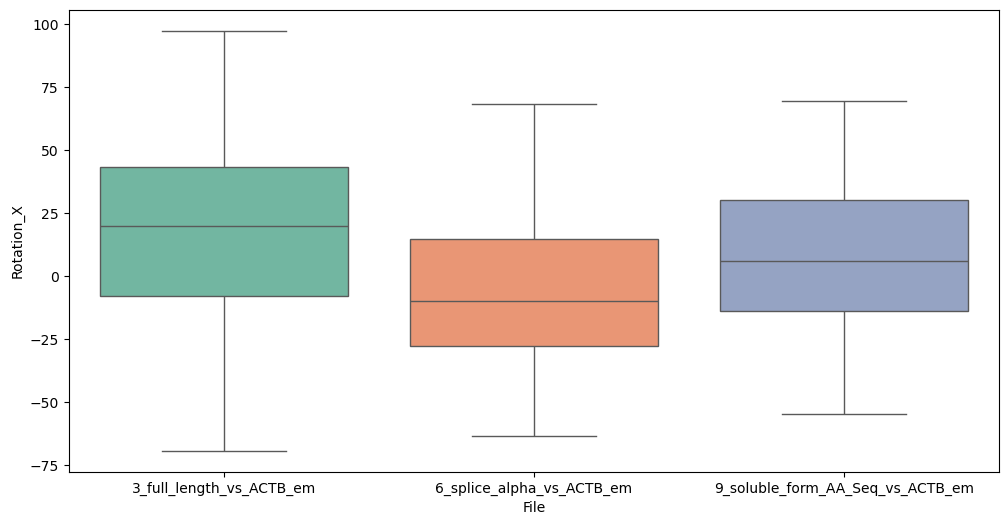

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
from statannotations.Annotator import Annotator
from scipy.stats import kruskal

# Define your folder path
folder_path = os.path.expanduser("~/Desktop/first_docking_results")

# Function to parse a single .out file with a more forgiving encoding
def parse_hdock_output(file_path):
    results = []
    with open(file_path, 'r', encoding='ISO-8859-1') as file:  # Use ISO-8859-1 encoding
        lines = file.readlines()
        for line in lines[5:]:  # Skip metadata (first 5 lines)
            data = line.split()
            if len(data) == 9:  # Check if it's a valid docking result line
                results.append({
                    "Translation_X": float(data[0]),
                    "Translation_Y": float(data[1]),
                    "Translation_Z": float(data[2]),
                    "Rotation_X": float(data[3]),
                    "Rotation_Y": float(data[4]),
                    "Rotation_Z": float(data[5]),
                    "Binding_Score": float(data[6]),
                    "RMSD": float(data[7]),
                    "Translational_ID": int(float(data[8]))
                })
    return results

# Parse all files and consolidate data
all_data = []
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):  # Only process files
        docking_results = parse_hdock_output(file_path)
        for result in docking_results:
            result["File"] = file_name  # Add file name for comparison
            result["Group"] = file_name.split("vs_")[-1].split(".")[0]  # Extract group name
        all_data.extend(docking_results)

# Convert all results into a single pandas DataFrame
df = pd.DataFrame(all_data)

# Check if data was parsed successfully
if df.empty:
    print("No docking results found in the folder.")
else:
    print("Combined Data Summary:")
    print(df.head())

    # Create output folder for comparison graphs
    output_folder = os.path.join(folder_path, "grouped_plots_with_stats")
    os.makedirs(output_folder, exist_ok=True)

    numerical_columns = ["Translation_X", "Translation_Y", "Translation_Z",
                         "Rotation_X", "Rotation_Y", "Rotation_Z",
                         "Binding_Score", "RMSD"]

    groups = df["Group"].unique()

    # Perform analysis for each group
    for group in groups:
        group_data = df[df["Group"] == group]
        group_folder = os.path.join(output_folder, group)
        os.makedirs(group_folder, exist_ok=True)

        print(f"\nPerforming analysis for group: {group}")

        # Perform statistical analysis for each numerical column
        summary_data = []

        for column in numerical_columns:
            plt.figure(figsize=(12, 6))

            # Boxplot
            sorted_files = sorted(group_data["File"].unique())
            ax = sns.boxplot(data=group_data, x="File", y=column, palette="Set2", order=sorted_files)

            # Kruskal-Wallis Test (non-parametric ANOVA)
            data_by_file = [group_data[group_data["File"] == f][column] for f in sorted_files]
            stat, p = kruskal(*data_by_file)
            print(f"{column} - Kruskal-Wallis p-value: {p:.4f}")

            # Post-hoc analysis if p < 0.05
            if p < 0.05:
                # Perform pairwise Dunn's test
                pairwise_pvals = sp.posthoc_dunn(group_data, val_col=column, group_col="File", p_adjust='holm')

                # Add annotations
                pairs = [(f1, f2) for i, f1 in enumerate(sorted_files) for f2 in sorted_files[i+1:]]
                annotator = Annotator(ax, pairs, data=group_data, x="File", y=column, order=sorted_files)
                annotator.configure(test=None, comparisons_correction="holm", verbose=0, pvalues=pairwise_pvals.values.flatten())
                annotator.annotate()

                # Save pairwise p-values table
                stats_table_path = os.path.join(group_folder, f"{column}_pairwise_stats.csv")
                pairwise_pvals.to_csv(stats_table_path)
                print(f"Pairwise statistical results saved to: {stats_table_path}")
            else:
                plt.title(f"No significant differences (p={p:.4f}) for {column}")

            # Add a grid and save plot
            plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
            plt.title(f"Comparison of {column} for Group '{group}'\n(Kruskal-Wallis p-value: {p:.4f})")
            plt.xticks(rotation=90)
            plt.ylabel(column)
            plt.xlabel("Files")
            plt.tight_layout()

            # Save plot
            plot_path = os.path.join(group_folder, f"{column}_comparison_with_stats.png")
            plt.savefig(plot_path)
            plt.close()

            print(f"Saved {column} comparison plot for group '{group}' to: {plot_path}")

        print(f"Statistical analysis completed for group '{group}'.\n")

    print(f"\nAll grouped comparative plots and statistics saved in: {output_folder}")
